In [1]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

In [6]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns= te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [7]:
from mlxtend.frequent_patterns import apriori

In [9]:
apriori(df, min_support=0.6)

,support,itemsets
0,0.8,(3)
1,1.0,(5)
2,0.6,(6)
3,0.6,(8)
4,0.6,(10)
5,0.8,"(3, 5)"
6,0.6,"(8, 3)"
7,0.6,"(5, 6)"
8,0.6,"(8, 5)"
9,0.6,"(10, 5)"


In [10]:
apriori(df, min_support=0.6 , use_colnames=True)

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"


In [12]:
frequentent_items = apriori(df, min_support=0.6, use_colnames= True)
frequentent_items['length'] = frequentent_items['itemsets'].apply(lambda x: len(x))
frequentent_items

,support,itemsets,length
0,0.8,(Eggs),1
1,1.0,(Kidney Beans),1
2,0.6,(Milk),1
3,0.6,(Onion),1
4,0.6,(Yogurt),1
5,0.8,"(Eggs, Kidney Beans)",2
6,0.6,"(Onion, Eggs)",2
7,0.6,"(Milk, Kidney Beans)",2
8,0.6,"(Onion, Kidney Beans)",2
9,0.6,"(Yogurt, Kidney Beans)",2


In [15]:
frequentent_items[(frequentent_items['length']==2) & (frequentent_items['support'] >= 0.8)]

,support,itemsets,length
5,0.8,"(Eggs, Kidney Beans)",2


In [16]:
frequentent_items[frequentent_items['itemsets']  =={'Onion','Eggs'}]

,support,itemsets,length
6,0.6,"(Onion, Eggs)",2


In [17]:
from mlxtend.frequent_patterns import association_rules

In [18]:
association_rules(frequentent_items, metric= 'confidence',min_threshold=0.7)  

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.000000
2,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
3,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.600000
4,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
5,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
6,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
7,"(Onion, Eggs)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
8,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
9,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.600000


In [20]:
rules = association_rules(frequentent_items , metric='lift',min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
1,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.600000
2,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
3,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.600000
4,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.00,1.25,0.12,inf
5,(Eggs),"(Onion, Kidney Beans)",0.8,0.6,0.6,0.75,1.25,0.12,1.600000


In [21]:
rules['antecedant_len'] = rules['antecedents'].apply(lambda x : len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,1
1,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.600000,1
2,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,2
3,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.600000,2
4,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.00,1.25,0.12,inf,1
5,(Eggs),"(Onion, Kidney Beans)",0.8,0.6,0.6,0.75,1.25,0.12,1.600000,1


In [22]:
rules[rules['antecedents'] == {'Eggs', 'Kidney Beans'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
3,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,2


In [ ]:
import re
from nltk.corpus import gutenberg as gu
import nltk
import re
import pandas as pd
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt


hamlet = gu.words('shakespeare-hamlet.txt')
macbeth = gu.words('shakespeare-macbeth.txt')
caesar = gu.words('shakespeare-caesar.txt')
shakespeare = hamlet+macbeth+caesar
milton = gu.words('milton-paradise.txt')
jane = gu.words('austen-persuasion.txt')
herman = gu.words('melville-moby_dick.txt')

class Frequency:
    def __init__(self,word_list):
        self.word_list = [w.lower() for w in list(filter(lambda w: re.match(r'[\w]',w), word_list))]
        self.size = len(self.word_list)
        self.smaller_list = []
        self.fdist ={}
        self.doc_term_matrix = pd.DataFrame()

    def smaller(self):
        for i in range(self.size//5000 + 1):
            self.smaller_list.append(self.word_list[5000*i:5000*(i+1)])

    def frequency(self,freqWords):
        self.doc_term_matrix = pd.DataFrame()
        for i in range(len(self.smaller_list)):
            temp = nltk.FreqDist(self.smaller_list[i])
            temp_fdist = [temp[key] for key in freqWords]
            self.doc_term_matrix['%d'%i] = pd.Series(temp_fdist,index=freqWords)
        self.doc_term_matrix.index = freqWords

    def average(self):
        return self.doc_term_matrix.mean(axis=1)

In [ ]:
class SVDProblem:
    def __init__(self,doc_term_matrix):
        self.doc_term_matrix = doc_term_matrix[doc_term_matrix.sum(axis=1)>0] #로 해야 되나요??? 어찌ㅎ바니까아
        self.word_normalized = self.doc_term_matrix.sub(self.doc_term_matrix.mean(axis=1), axis=0).divide(self.doc_term_matrix.std(axis=1), axis=0)
        self.doc_normalized = (self.doc_term_matrix-self.doc_term_matrix.mean(axis=0))
        self.U = None

    def SVD(self,key=None):
        if key == 'word':
            self.U, _, _ = svd(self.word_normalized)
        elif key == 'doc':
            self.U, _, _ = svd(self.doc_normalized)
        else:
            print('Insert KEY')

    def plot(self, key=None, title = None):
        plt.figure()
        u = pd.DataFrame(self.U)
        X = u[0]
        Y = u[1]
        plt.scatter(X, Y)
        if key == 'word':
            for i, txt in enumerate(self.doc_term_matrix.index):
                plt.annotate(txt, (X[i], Y[i]))
                plt.title(title+' words')
        elif key == 'doc':
            plt.title(title)

In [ ]:
S = Frequency(shakespeare)
M = Frequency(milton)
J = Frequency(jane)
H = Frequency(herman)

for i,word in enumerate(S.word_list):
    if word == 'haue':
        S.word_list[i] = 'have'

total = S.word_list + M.word_list + J.word_list + H.word_list
fdist = nltk.FreqDist(total)
fdist
freqList = fdist.most_common(50)
freqWords = [w for w,_ in freqList]

S.smaller()
S.frequency(freqWords)
S.doc_term_matrix
M.smaller()
M.frequency(freqWords)
M.doc_term_matrix
J.smaller()
J.frequency(freqWords)
J.doc_term_matrix
H.smaller()
H.frequency(freqWords)
H.doc_term_matrix
df_avg = pd.DataFrame()
df_avg['Shakespeare'] = S.average()
df_avg['Milton'] = M.average()
df_avg['Jane'] = J.average()
df_avg['Herman'] = H.average()
df_avg.index = list(range(50))
df_avg.plot()
for i, txt in enumerate(freqWords):
    plt.annotate(txt, (df_avg.index[i],df_avg.Herman[i]))
plt.title('means')

S_svd = SVDProblem(S.doc_term_matrix)
M_svd = SVDProblem(M.doc_term_matrix)
J_svd = SVDProblem(J.doc_term_matrix)
H_svd = SVDProblem(H.doc_term_matrix)

In [ ]:
## SVD

In [ ]:
S_svd.SVD('word')
S_svd.plot(key='word',title='Shakespeare')

In [ ]:
M_svd.SVD('word')
M_svd.plot(key='word',title='Milton')

In [ ]:
J_svd.SVD('word')
J_svd.plot(key='word',title='Jane')

In [ ]:
H_svd.SVD('word')
H_svd.plot(key='word',title='Herman')

In [ ]:
S_svd.SVD('doc')
S_svd.plot(key='doc',title='Shakespeare')

In [ ]:
M_svd.SVD('doc')
M_svd.plot(key='doc',title='Milton')

In [ ]:
J_svd.SVD('doc')
J_svd.plot(key='doc',title='Jane')

In [ ]:
H_svd.SVD('doc')
H_svd.plot(key='doc',title='Herman')

In [ ]:
############
### Ver2 ###
############
#

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

total2 = list(filter(lambda w: w not in stop, total))
fdist2 = nltk.FreqDist(total2)
freqList2 = fdist2.most_common(50)
freqWords2 = [w for w,_ in freqList2]

S.frequency(freqWords2)
S.doc_term_matrix

M.frequency(freqWords2)
M.doc_term_matrix

J.frequency(freqWords2)
J.doc_term_matrix

H.frequency(freqWords2)
H.doc_term_matrix

df_avg = pd.DataFrame()
df_avg['Shakespeare'] = S.average()
df_avg['Milton'] = M.average()
df_avg['Jane'] = J.average()
df_avg['Herman'] = H.average()
df_avg.index = list(range(50))

df_avg.plot()
for i, txt in enumerate(freqWords2):
    plt.annotate(txt, (df_avg.index[i],df_avg.Herman[i]))
plt.title('means')

S_svd = SVDProblem(S.doc_term_matrix)
M_svd = SVDProblem(M.doc_term_matrix)
J_svd = SVDProblem(J.doc_term_matrix)
H_svd = SVDProblem(H.doc_term_matrix)

In [ ]:
# WORD

In [ ]:
S_svd.SVD('word')
S_svd.plot(key='word',title='Shakespeare')

In [ ]:
M_svd.SVD('word')
M_svd.plot(key='word',title='Milton')

In [ ]:
J_svd.SVD('word')
J_svd.plot(key='word',title='Jane')

In [ ]:
H_svd.SVD('word')
H_svd.plot(key='word',title='Herman')

In [ ]:
# DOCUMENT

In [ ]:
S_svd.SVD('doc')
S_svd.plot(key='doc',title='Shakespeare')

In [ ]:
M_svd.SVD('doc')
M_svd.plot(key='doc',title='Milton')

In [ ]:
J_svd.SVD('doc')
J_svd.plot(key='doc',title='Jane')

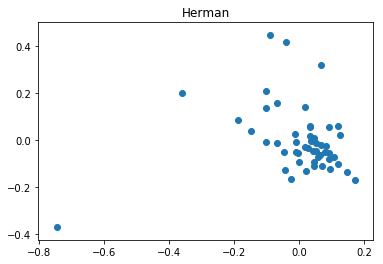

In [6]:
H_svd.SVD('doc')
H_svd.plot(key='doc',title='Herman')

In [5]:
H_svd